In [1]:
import torch
import matplotlib.pyplot as plt

In [4]:
prefix = 'results/global_viscocity/'
mlp_vis0_retrained = torch.load(prefix + 'trained_mlp_vis0.pth')
mlp_vis0 = torch.load(prefix + 'pretrained_mlp_vis0.pth')
mlp_vis1 = torch.load(prefix + 'pretrained_mlp_vis1.pth')
mlp_vis2 = torch.load(prefix + 'pretrained_mlp_vis2.pth')
mlp_vis4 = torch.load(prefix + 'pretrained_mlp_vis4.pth')
mlp_vis4_10M = torch.load(prefix + 'pretrained_mlp_vis4_10M.pth')
mlp_vis4_10M_notime = torch.load(prefix + 'pretrained_mlp_vis4_10M_notime.pth')
ncap_vis0 = torch.load(prefix + 'pretrained_ncap_vis0.pth')
ncap_vis1 = torch.load(prefix + 'pretrained_ncap_vis1.pth')
ncap_vis2 = torch.load(prefix + 'pretrained_ncap_vis2.pth')
ncap_vis4 = torch.load(prefix + 'pretrained_ncap_vis4.pth')

In [3]:
mlp_vis0

{'viscocities': [0, 1, 2],
 'results': tensor([[977.4984, 976.9429, 983.9047, 988.2082, 990.4225, 972.9710, 989.4480,
          988.4086, 987.9575, 985.0672],
         [305.8659, 295.0160, 293.1718, 292.3071, 289.9585, 293.9275, 302.4786,
          290.7848, 303.7008, 294.5337],
         [158.3980, 153.7244, 153.7647, 160.2400, 160.8983, 148.2102, 171.7972,
          150.3925, 156.5044, 153.0898]], dtype=torch.float64)}

/tmp/ipykernel_1254823/3188340572.py:14: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


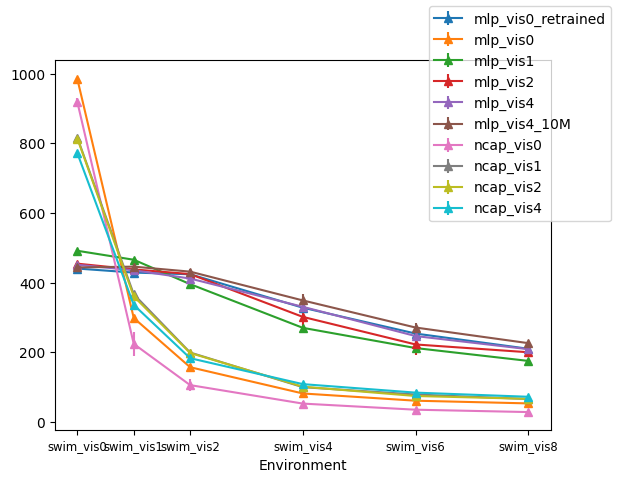

In [3]:
envs = mlp_vis0["envs"]
results = mlp_vis0["results"]
viscocities = [0.0, 0.1, 0.2, 0.4, 0.6, 0.8]

fig, axs = plt.subplots(1, 1)
for model_name in ['mlp_vis0_retrained', 'mlp_vis0', 'mlp_vis1', 'mlp_vis2', 'mlp_vis4', 'mlp_vis4_10M', 'mlp_vis4_10M_notime',
'ncap_vis0', 'ncap_vis1', 'ncap_vis2', 'ncap_vis4']:
    model = eval(model_name)
    axs.errorbar(viscocities, model["results"].mean(axis=-1), model["results"].std(axis=-1), label=model_name, marker='^')
# use envs strings as xticks
axs.set_xticks(viscocities, envs, size='small')
axs.set_xlabel('Environment')
fig.legend()
fig.show()